In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline

In [2]:
filename = '2_data.csv'
df = pd.read_csv(filename)
df

,area,price
0,2500,590000
1,3000,670000
2,3500,721000
3,3800,850000
4,4000,925000


In [3]:
area = df[['area']]
price = df.price

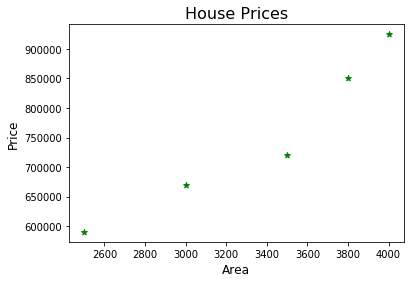

In [20]:
plt.xlabel("Area", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title('House Prices', fontsize = 16)

plt.scatter(df.area, df.price, color='green', marker = '*')
plt.show()

In [ ]:
#model = linear_model.LinearRegression()
#model.fit(area, price)

In [18]:
model = linear_model.LinearRegression()
model.fit(df.area.values.reshape(-1, 1), df.price.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
model.coef_

array([[213.36461126]])

In [21]:
model.intercept_

array([34294.90616622])

In [22]:
model.predict([[3200]])

array([[717061.66219839]])

Text(0, 0.5, 'Price')

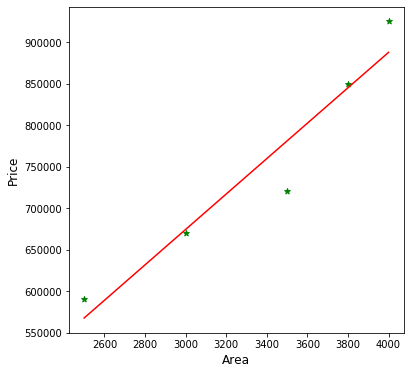

In [34]:
plt.figure(figsize=(6, 6))
plt.scatter(df.area.values.reshape(-1, 1), df.price.values.reshape(-1, 1), color='green', marker='*')
plt.plot(area, model.predict(area), c='red')
plt.xlabel('Area', fontsize=12)
plt.ylabel('Price', fontsize=12)

In [36]:
predict_filename = "2_predict.csv"
predict_df2 = pd.read_csv(predict_filename)

In [37]:
predict_df2.head()

,area
0,1000
1,1500
2,2000
3,3540
4,4120


In [38]:
prediction_df = model.predict(predict_df2)
prediction_df

array([[ 247659.51742627],
       [ 354341.8230563 ],
       [ 461024.12868633],
       [ 789605.63002681],
       [ 913357.10455764],
       [1007237.53351206],
       [1186463.80697051],
       [ 774670.10723861],
       [ 941094.50402145],
       [ 529300.80428954],
       [1970578.75335121],
       [1878831.97050938],
       [1549183.6461126 ]])

In [44]:
predict_df2['prices'] = prediction_df
predict_df2.head()

,area,prices
0,1000,247659.517426
1,1500,354341.823056
2,2000,461024.128686
3,3540,789605.630027
4,4120,913357.104558


In [42]:
predict_df2.to_csv('myprediction.csv')

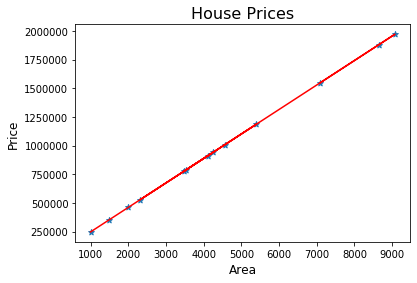

In [50]:
plt.xlabel ('Area', fontsize=12)
plt.ylabel ('Price', fontsize=12)
plt.title ('House Prices', fontsize=16)
plt.scatter (predict_df2.area.values.reshape(-1, 1), predict_df2.prices.values.reshape(-1, 1), marker = '*')
plt.plot(predict_df2.area.values.reshape(-1, 1), model.predict(predict_df2[['area']]), color='red')
plt.show()